# Data Toolkit — Practice Questions  
**Submitter Name:** Aasif Majeed  
**Date:** 25 May 2024  

This notebook solves the *Data Toolkit Practice Questions* with:
- Each question written with its question number  
- Detailed explanation in Markdown  
- Code (NumPy / Pandas / Matplotlib / Seaborn / Bokeh / Plotly) where required  

> The People Dataset link is provided in the assignment PDF.  
> The code includes an optional download step (using `gdown`). If you already have `data.csv`, place it next to this notebook.


---  
## 0) Setup / Imports  
If you are running this locally and some libraries are missing, install them:

```bash
pip install numpy pandas matplotlib seaborn scipy bokeh plotly gdown
```

- **Matplotlib** plots appear inline in Jupyter.  
- **Bokeh** and **Plotly** create interactive outputs in notebooks.  
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)  # reproducibility

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)


NumPy: 1.26.4
Pandas: 2.2.2


### Helper: Load People Dataset (`data.csv`)  

Expected file name in tasks: **`data.csv`**.

This helper:
1. Loads local `data.csv` if present.
2. Otherwise tries to download from Google Drive using `gdown` (requires internet access).


In [2]:
from pathlib import Path
import pandas as pd

PEOPLE_CSV = Path("data.csv")
PEOPLE_FILE_ID = "13x8f8HNKieSRAzxTIzAojaYp8Up8cefk"  # from assignment PDF

def load_people_dataset(csv_path=PEOPLE_CSV):
    if csv_path.exists():
        print(f"✅ Found local file: {csv_path.resolve()}")
        return pd.read_csv(csv_path)

    print("⚠️ data.csv not found locally. Attempting download using gdown...")
    try:
        import gdown  # pip install gdown
        url = f"https://drive.google.com/uc?id={PEOPLE_FILE_ID}"
        gdown.download(url, str(csv_path), quiet=False)
        if csv_path.exists():
            print(f"✅ Downloaded: {csv_path.resolve()}")
            return pd.read_csv(csv_path)
        raise FileNotFoundError("Download did not create data.csv.")
    except Exception as e:
        print("❌ Could not download dataset automatically.")
        print("Reason:", e)
        print("\n➡️ Please download the People Dataset manually from the assignment link and save it as 'data.csv' next to this notebook.")
        return None

people_df = load_people_dataset()
people_df.head() if people_df is not None else "People dataset not loaded."


⚠️ data.csv not found locally. Attempting download using gdown...


Downloading...
From: https://drive.google.com/uc?id=13x8f8HNKieSRAzxTIzAojaYp8Up8cefk
To: /Users/aasif/Downloads/data_sceice_pro_assignments /data.csv
100%|██████████| 119k/119k [00:00<00:00, 83.1MB/s]

✅ Downloaded: /Users/aasif/Downloads/data_sceice_pro_assignments /data.csv


,Index,User Id,First Name,Last Name,Gender,Email,Phone,Date of birth,Job Title,Salary
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,27-01-2014,Probation officer,90000
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,NaN,26-07-1931,Dancer,80000
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,25-11-2013,Copy,50000
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,NaN,17-11-2012,Counselling psychologist,65000
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,15-04-1923,Biomedical engineer,100000


---
## Q1) Demonstrate three different methods for creating identical 2D arrays in NumPy. Provide the code for each method and the final output after each method.
---

We can create identical 2D arrays in multiple ways. Below are **three common methods**:

1. **Directly using `np.array()`** with a Python list-of-lists  
2. **Using `np.zeros()` and then filling values**  
3. **Using `np.arange()` and `reshape()`** to generate a sequence and reshape into 2D  

All three will result in the *same* final array.


In [3]:
import numpy as np

# Method 1: np.array with explicit values
A1 = np.array([[1, 2, 3],
               [4, 5, 6]])
print("A1:\n", A1)

# Method 2: zeros + fill
A2 = np.zeros((2, 3), dtype=int)
A2[:] = [[1, 2, 3],
         [4, 5, 6]]
print("\nA2:\n", A2)

# Method 3: arange + reshape
A3 = np.arange(1, 7).reshape(2, 3)
print("\nA3:\n", A3)

print("\nAll identical?", np.array_equal(A1, A2) and np.array_equal(A2, A3))


A1:
 [[1 2 3]
 [4 5 6]]

A2:
 [[1 2 3]
 [4 5 6]]

A3:
 [[1 2 3]
 [4 5 6]]

All identical? True


---
## Q2) Using the NumPy function, generate an array of 100 evenly spaced numbers between 1 and 10 and reshape that 1D array into a 2D array.
---

Use `np.linspace(start, stop, num)` to generate evenly spaced values, then `reshape()` into 2D.  
Since we have 100 elements, a natural 2D shape is **(10, 10)**.


In [4]:
arr_1d = np.linspace(1, 10, 100)
arr_2d = arr_1d.reshape(10, 10)

print("1D shape:", arr_1d.shape)
print("2D shape:", arr_2d.shape)
arr_2d


1D shape: (100,)
2D shape: (10, 10)


array([[ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
         1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182],
       [ 1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
         2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273],
       [ 2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
         3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364],
       [ 3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
         4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455],
       [ 4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
         5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545],
       [ 5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
         6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636],
       [ 6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
         6.90909091,  7.        ,  7.09090909

---
## Q3) Explain the following terms: (i) difference in np.array, np.asarray and np.asanyarray (ii) difference between deep copy and shallow copy.
---

### (i) `np.array` vs `np.asarray` vs `np.asanyarray`

- **`np.array(obj)`**
  - Always returns a **NumPy ndarray**.
  - Often makes a **copy** (unless it can safely avoid copying).
  - Use when you want to guarantee a plain ndarray.

- **`np.asarray(obj)`**
  - Converts input to an **ndarray**, but **avoids copying if input is already an ndarray**.
  - Efficient when you just need “array-like” input as an ndarray.

- **`np.asanyarray(obj)`**
  - Like `asarray`, but it **preserves subclasses** (e.g., `np.matrix`, `np.ma.MaskedArray`).

### (ii) Deep copy vs Shallow copy

- **Shallow copy / view**
  - Shares underlying data with the original.
  - Changing original can change the view.
  - Example in NumPy: `view()`, slicing often returns views.

- **Deep copy**
  - Independent copy of data in memory.
  - Changes in one do not affect the other.
  - Example: `copy()`.

Below is a short demo.


In [5]:
import numpy as np

# array/asarray demo
x = np.array([1, 2, 3])
a2 = np.array(x)       # usually copies
b2 = np.asarray(x)     # usually no copy

print("a2 is x?", a2 is x)
print("b2 is x?", b2 is x)

# shallow vs deep copy demo
arr = np.arange(6).reshape(2, 3)
shallow = arr.view()   # shares data
deep = arr.copy()      # independent

arr[0, 0] = 999
print("\nOriginal:\n", arr)
print("Shallow view (changes too):\n", shallow)
print("Deep copy (unchanged):\n", deep)


a2 is x? False
b2 is x? True

Original:
 [[999   1   2]
 [  3   4   5]]
Shallow view (changes too):
 [[999   1   2]
 [  3   4   5]]
Deep copy (unchanged):
 [[0 1 2]
 [3 4 5]]


---
## Q4) Generate a 3x3 array with random floating-point numbers between 5 and 20. Then round each number to 2 decimal places.
---

Generate floats with `np.random.uniform(5, 20, (3,3))` and round with `np.round(arr, 2)`.

In [6]:
rand_3x3 = np.random.uniform(5, 20, size=(3, 3))
rounded_3x3 = np.round(rand_3x3, 2)

print("Original:\n", rand_3x3)
print("\nRounded to 2 decimals:\n", rounded_3x3)


Original:
 [[10.61810178 19.2607146  15.97990913]
 [13.97987726  7.34027961  7.33991781]
 [ 5.87125418 17.99264219 14.01672518]]

Rounded to 2 decimals:
 [[10.62 19.26 15.98]
 [13.98  7.34  7.34]
 [ 5.87 17.99 14.02]]


---
## Q5) Create a NumPy array with random integers between 1 and 10 of shape (5, 6). Extract (a) all even integers (b) all odd integers.
---

Use `np.random.randint(1, 11, (5,6))` (11 is exclusive so this includes 10). Use boolean masks for even/odd extraction.

In [7]:
arr_5x6 = np.random.randint(1, 11, size=(5, 6))
evens = arr_5x6[arr_5x6 % 2 == 0]
odds  = arr_5x6[arr_5x6 % 2 != 0]

print("Array (5x6):\n", arr_5x6)
print("\nEven integers:", evens)
print("Odd integers :", odds)


Array (5x6):
 [[ 8  3  6  5  2  8]
 [ 6  2  5  1 10  6]
 [ 9  1 10  3  7  4]
 [ 9  3  5  3  7  5]
 [ 9  7  2  4  9  2]]

Even integers: [ 8  6  2  8  6  2 10  6 10  4  2  4  2]
Odd integers : [3 5 5 1 9 1 3 7 9 3 5 3 7 5 9 7 9]


---
## Q6) Create a 3D NumPy array (3,3,3) with random integers 1–10. (a) Find indices of maximum values along third axis. (b) Perform element-wise multiplication between both arrays.
---

(a) `np.argmax(A, axis=2)` gives the depth index (0/1/2) of the maximum for each (row, col).  
(b) The question mentions "both array", so we create a second array `B` and multiply `A * B`.

In [8]:
A = np.random.randint(1, 11, size=(3, 3, 3))
B = np.random.randint(1, 11, size=(3, 3, 3))

max_idx_depth = np.argmax(A, axis=2)
mul = A * B

print("Array A:\n", A)
print("\nIndices of max along depth (axis=2):\n", max_idx_depth)
print("\nArray B:\n", B)
print("\nA * B:\n", mul)


Array A:
 [[[10  9 10]
  [ 5  2  4]
  [ 7  8  3]]

 [[ 1  4  2]
  [ 8  4  2]
  [ 6  6 10]]

 [[ 4  6  2]
  [10  2 10]
  [ 4  8  7]]]

Indices of max along depth (axis=2):
 [[0 0 1]
 [1 0 2]
 [1 0 1]]

Array B:
 [[[ 9  8  5]
  [ 2  5  8]
  [10  9  9]]

 [[ 1  9  7]
  [ 9  8  1]
  [ 8  8  3]]

 [[ 1  8  3]
  [ 3  1  5]
  [10  7 10]]]

A * B:
 [[[90 72 50]
  [10 10 32]
  [70 72 27]]

 [[ 1 36 14]
  [72 32  2]
  [48 48 30]]

 [[ 4 48  6]
  [30  2 50]
  [40 56 70]]]


---
## Q7) Clean and transform the 'Phone' column in the sample dataset: remove non-numeric characters and convert to numeric. Also display table attributes and dtypes.
---

We will do this using the People dataset (if loaded).  
- Use regex to keep only digits: `str.replace(r'\D','', regex=True)`  
- Convert to numeric using `pd.to_numeric(..., errors='coerce')`  
- Show `.shape`, `.columns`, `.info()` and `dtypes`.


In [9]:
import pandas as pd

if people_df is None:
    print("People dataset not loaded. Please load data.csv first.")
else:
    df = people_df.copy()

    print("Shape:", df.shape)
    print("Columns:", list(df.columns))
    print("\n--- df.info() ---")
    df.info()

    if "Phone" in df.columns:
        df["Phone_clean"] = df["Phone"].astype(str).str.replace(r"\D", "", regex=True)
        df["Phone_clean"] = pd.to_numeric(df["Phone_clean"], errors="coerce")

        print("\nDtypes (Phone vs Phone_clean):")
        print(df[["Phone", "Phone_clean"]].dtypes)

        df[["Phone", "Phone_clean"]].head(10)
    else:
        print("Column 'Phone' not found.")


Shape: (1000, 10)
Columns: ['Index', 'User Id', 'First Name', 'Last Name', 'Gender', 'Email', 'Phone', 'Date of birth', 'Job Title', 'Salary']

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Gender         1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          979 non-null    object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
 9   Salary         1000 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 78.3+ KB

Dtypes (Phone vs Phone_clean):
Phone           object
Phone_clean    float64
dtype: object


---
## Q8) People dataset tasks: (a) read data.csv skipping first 50 rows (b) read only columns Last Name, Gender, Email, Phone, Salary (c) display first 10 rows (d) Salary as Series and show last 5 values.
---

Use `skiprows=50` and `usecols=[...]` in `pd.read_csv`. Then `head(10)` and `tail(5)` for Salary.

In [10]:
import pandas as pd

usecols = ["Last Name", "Gender", "Email", "Phone", "Salary"]

try:
    people_filtered = pd.read_csv("data.csv", skiprows=50, usecols=usecols)
    print("Filtered shape:", people_filtered.shape)
    display(people_filtered.head(10))

    salary_series = people_filtered["Salary"]
    print("\nLast 5 Salary values:")
    display(salary_series.tail(5))
except FileNotFoundError:
    print("data.csv not found. Please download/save it next to this notebook.")
except ValueError as e:
    print("CSV column mismatch (names may differ).")
    print("Error:", e)


CSV column mismatch (names may differ).
Error: Usecols do not match columns, columns expected but not found: ['Email', 'Last Name', 'Salary', 'Phone', 'Gender']


---
## Q9) Filter People_Dataset where Last Name contains 'Duke', Gender contains Female, and Salary < 85000.
---

Convert Salary to numeric and then apply combined boolean masks using `str.contains()`.

In [11]:
import pandas as pd

if people_df is None:
    print("People dataset not loaded.")
else:
    df = people_df.copy()
    df["Salary"] = pd.to_numeric(df.get("Salary"), errors="coerce")

    mask = (
        df["Last Name"].astype(str).str.contains("Duke", case=False, na=False) &
        df["Gender"].astype(str).str.contains("Female", case=False, na=False) &
        (df["Salary"] < 85000)
    )

    filtered = df.loc[mask, [c for c in ["Last Name", "Gender", "Email", "Phone", "Salary"] if c in df.columns]]
    print("Number of matching rows:", len(filtered))
    filtered.head(20)


Number of matching rows: 4


---
## Q10) Create a 7×5 DataFrame using a Series generated from 35 random integers between 1 to 6.
---

Generate 35 integers (1–6), reshape to 7×5, and build a DataFrame.

In [12]:
import numpy as np
import pandas as pd

vals = np.random.randint(1, 7, size=35)
s = pd.Series(vals)

df_7x5 = pd.DataFrame(s.values.reshape(7, 5), columns=[f"col{i}" for i in range(1, 6)])
df_7x5


,col1,col2,col3,col4,col5
0,1,4,1,4,2
1,1,6,5,3,4
2,6,3,3,1,3
3,5,6,3,1,5
4,2,6,3,1,2
5,2,4,5,3,1
6,4,5,4,6,5


---
## Q11) Create two Series (length 50): random 10–50 and random 100–1000. Join into DataFrame and rename columns to col1, col2.
---

Use `pd.concat` to join as columns and rename.

In [13]:
import numpy as np
import pandas as pd

s1 = pd.Series(np.random.randint(10, 51, size=50))
s2 = pd.Series(np.random.randint(100, 1001, size=50))

df_joined = pd.concat([s1, s2], axis=1)
df_joined.columns = ["col1", "col2"]
df_joined.head()


,col1,col2
0,32,835
1,48,324
2,24,484
3,38,502
4,45,737


---
## Q12) Using people dataset: (a) delete Email, Phone, Date of birth columns (b) delete rows with any missing values (c) print final output.
---

Use `drop(columns=..., errors='ignore')` and then `dropna()`.

In [14]:
if people_df is None:
    print("People dataset not loaded.")
else:
    df = people_df.copy()
    df2 = df.drop(columns=["Email", "Phone", "Date of birth"], errors="ignore")
    df2 = df2.dropna()

    print("Final shape:", df2.shape)
    df2.head(20)


Final shape: (1000, 7)


---
## Q13) Create x and y arrays (100 random floats). Scatter plot red 'o'. Add y=0.5 dashed line and x=0.5 dotted line. Label axes, title, and legend.
---

Matplotlib scatter + `axhline` and `axvline`.

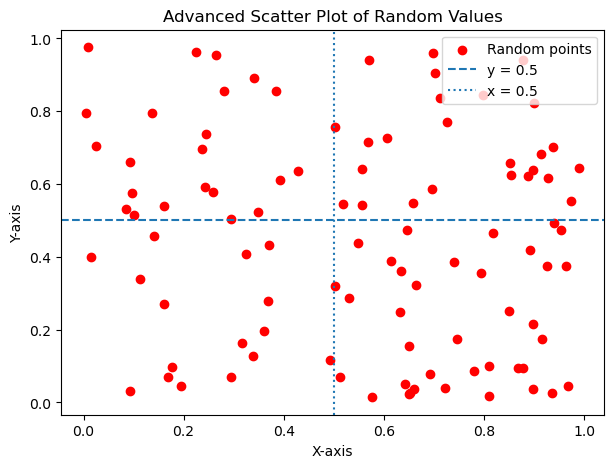

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100)
y = np.random.rand(100)

plt.figure(figsize=(7,5))
plt.scatter(x, y, color="red", marker="o", label="Random points")
plt.axhline(0.5, linestyle="--", label="y = 0.5")
plt.axvline(0.5, linestyle=":", label="x = 0.5")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Advanced Scatter Plot of Random Values")
plt.legend()
plt.show()


---
## Q14) Create a time-series DataFrame with Date, Temperature, Humidity. Plot both with different y-axes; label x-axis as Date; title 'Temperature and Humidity Over Time'.
---

Use `twinx()` to create a second y-axis for humidity.

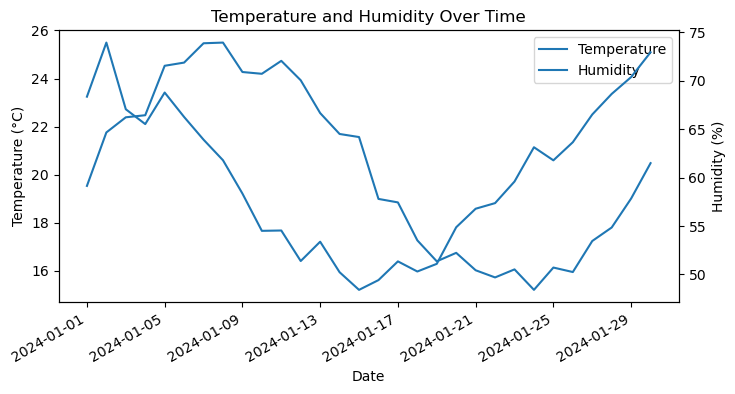

,Date,Temperature,Humidity
0,2024-01-01,19.528508,68.363559
1,2024-01-02,21.754534,73.950980
2,2024-01-03,22.385058,67.063719
3,2024-01-04,22.471543,65.532553
4,2024-01-05,24.530490,68.790085


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dates = pd.date_range("2024-01-01", periods=30, freq="D")
temp = 20 + 5*np.sin(np.linspace(0, 2*np.pi, 30)) + np.random.normal(0, 0.8, 30)
humid = 60 + 10*np.cos(np.linspace(0, 2*np.pi, 30)) + np.random.normal(0, 2.0, 30)

ts_df = pd.DataFrame({"Date": dates, "Temperature": temp, "Humidity": humid})

fig, ax1 = plt.subplots(figsize=(8,4))
ax1.plot(ts_df["Date"], ts_df["Temperature"], label="Temperature")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (°C)")

ax2 = ax1.twinx()
ax2.plot(ts_df["Date"], ts_df["Humidity"], label="Humidity")
ax2.set_ylabel("Humidity (%)")

plt.title("Temperature and Humidity Over Time")
fig.autofmt_xdate()

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper right")

plt.show()

ts_df.head()


---
## Q15) Create a NumPy array with 1000 samples from a normal distribution. Plot histogram (30 bins), overlay normal PDF line, label axes, title 'Histogram with PDF Overlay'.
---

Use `density=True` so the histogram scale matches the PDF curve.

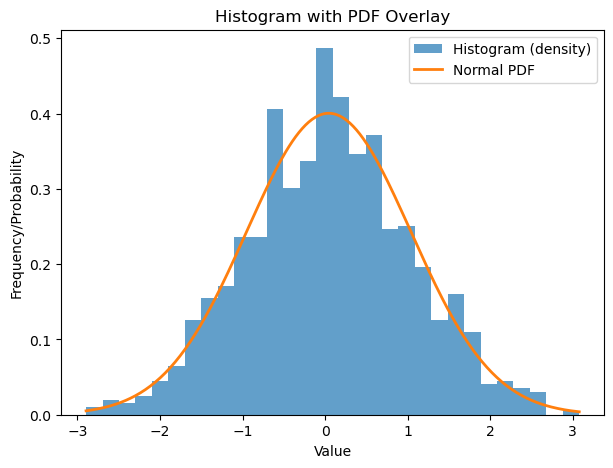

Sample mean: 0.043952318056949796
Sample std : 0.996367921766332


In [17]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(loc=0, scale=1, size=1000)

plt.figure(figsize=(7,5))
plt.hist(data, bins=30, density=True, alpha=0.7, label="Histogram (density)")

mu = data.mean()
sigma = data.std(ddof=0)

xs = np.linspace(data.min(), data.max(), 300)
pdf = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((xs-mu)/sigma)**2)

plt.plot(xs, pdf, linewidth=2, label="Normal PDF")
plt.xlabel("Value")
plt.ylabel("Frequency/Probability")
plt.title("Histogram with PDF Overlay")  # also satisfies Q16
plt.legend()
plt.show()

print("Sample mean:", mu)
print("Sample std :", sigma)


---
## Q16) Set the title of the plot as 'Histogram with PDF Overlay'.
---

Already done in **Q15** using:

```python
plt.title("Histogram with PDF Overlay")
```

So Q16 is satisfied by the code and output in Q15.


---
## Q17) Create a Seaborn scatter plot of two random arrays; color points based on quadrants; add legend; label axes; title 'Quadrant-wise Scatter Plot'.
---

Assign each point to a quadrant relative to the origin (0,0) and use `hue` in Seaborn.

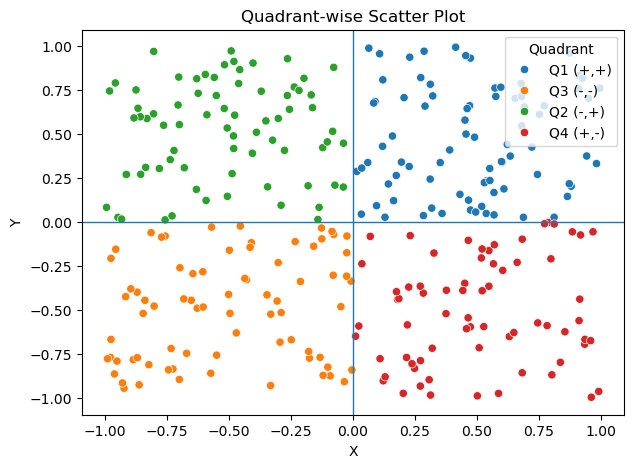

In [18]:
try:
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    x = np.random.uniform(-1, 1, size=300)
    y = np.random.uniform(-1, 1, size=300)

    def quadrant(xv, yv):
        if xv >= 0 and yv >= 0: return "Q1 (+,+)"
        if xv < 0 and yv >= 0:  return "Q2 (-,+)"
        if xv < 0 and yv < 0:   return "Q3 (-,-)"
        return "Q4 (+,-)"

    dfq = pd.DataFrame({"x": x, "y": y, "quadrant": [quadrant(x[i], y[i]) for i in range(len(x))]})

    plt.figure(figsize=(7,5))
    sns.scatterplot(data=dfq, x="x", y="y", hue="quadrant")
    plt.axhline(0, linewidth=1)
    plt.axvline(0, linewidth=1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Quadrant-wise Scatter Plot")
    plt.legend(title="Quadrant")
    plt.show()
except Exception as e:
    print("Seaborn demo skipped:", e)


---
## Q18) With Bokeh, plot a line chart of a sine wave function, add grid lines, label axes, title 'Sine Wave Function'.
---

Bokeh needs `output_notebook()` to show interactive plots inside Jupyter.

In [19]:
try:
    import numpy as np
    from bokeh.io import output_notebook, show
    from bokeh.plotting import figure

    output_notebook()

    x = np.linspace(0, 4*np.pi, 400)
    y = np.sin(x)

    p = figure(title="Sine Wave Function", width=700, height=350)
    p.line(x, y, line_width=2)
    p.xaxis.axis_label = "x"
    p.yaxis.axis_label = "sin(x)"
    p.grid.visible = True

    show(p)
except Exception as e:
    print("Bokeh demo skipped:", e)


Loading BokehJS ...

---
## Q19) Using Bokeh, generate a bar chart of random categorical data; color bars based on values; add hover tooltips; label axes; title 'Random Categorical Bar Chart'.
---

We use `linear_cmap` to map bar colors based on value and `HoverTool` to display exact values.

In [20]:
try:
    import numpy as np
    from bokeh.io import output_notebook, show
    from bokeh.plotting import figure
    from bokeh.models import ColumnDataSource, HoverTool
    from bokeh.transform import linear_cmap
    from bokeh.palettes import Viridis256

    output_notebook()

    categories = [f"Cat{i}" for i in range(1, 9)]
    values = np.random.randint(10, 100, size=len(categories))

    source = ColumnDataSource(data=dict(categories=categories, values=values))
    mapper = linear_cmap(field_name="values", palette=Viridis256, low=int(values.min()), high=int(values.max()))

    p = figure(x_range=categories, title="Random Categorical Bar Chart", width=750, height=350)
    p.vbar(x="categories", top="values", width=0.7, source=source, fill_color=mapper, line_color=None)

    p.add_tools(HoverTool(tooltips=[("Category", "@categories"), ("Value", "@values")]))
    p.xaxis.axis_label = "Category"
    p.yaxis.axis_label = "Value"
    p.grid.visible = True

    show(p)
except Exception as e:
    print("Bokeh demo skipped:", e)


Loading BokehJS ...

---
## Q20) Using Plotly, create a basic line plot of random data; label axes; title 'Simple Line Plot'.
---

Plotly Express makes this easy with `px.line`.

In [21]:
try:
    import numpy as np
    import pandas as pd
    import plotly.express as px

    y = np.random.randn(100).cumsum()
    df_line = pd.DataFrame({"x": np.arange(len(y)), "y": y})

    fig = px.line(df_line, x="x", y="y", title="Simple Line Plot")
    fig.update_xaxes(title_text="X-axis")
    fig.update_yaxes(title_text="Y-axis")
    fig.show()
except Exception as e:
    print("Plotly demo skipped:", e)


---
## Q21) Using Plotly, create an interactive pie chart of random data; add labels and percentages; title 'Interactive Pie Chart'.
---

Use `px.pie` and set `textinfo='percent+label'` to show both label and percentage on the chart.

In [22]:
try:
    import numpy as np
    import pandas as pd
    import plotly.express as px

    labels = ["A", "B", "C", "D", "E"]
    values = np.random.randint(10, 100, size=len(labels))
    df_pie = pd.DataFrame({"label": labels, "value": values})

    fig = px.pie(df_pie, names="label", values="value", title="Interactive Pie Chart")
    fig.update_traces(textinfo="percent+label")
    fig.show()
except Exception as e:
    print("Plotly demo skipped:", e)
